MACHINE LEARNING PROJECT : LOGISTIC REGRESSION MODEL                  
Dataset: HMEQ Credit Risk Dataset (hmeq.csv)                            
Student: Rahmah Jamshed                    
Course: B.Tech CSE (Data Science and Artificial Intelligence)           
College Machine Learning Mini Project

In [1]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
# 1. LOAD THE DATASET

data = pd.read_csv("hmeq.csv")    

# Display first few rows
print("First 5 rows of dataset:")
print(data.head())


First 5 rows of dataset:
   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  


In [3]:
# 2. BASIC DATA UNDERSTANDING

print("\nDataset Shape:", data.shape)
print("\nMissing values in each column:")
print(data.isnull().sum())



Dataset Shape: (5960, 13)

Missing values in each column:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [4]:
#  3. HANDLING MISSING VALUES
# Strategy:
# - For numerical columns → fill with mean
# - For categorical columns → fill with mode

for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

print("\nMissing values after cleaning:")
print(data.isnull().sum())



Missing values after cleaning:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


C:\Users\RAHMAH\AppData\Local\Temp\ipykernel_17112\2712729003.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\RAHMAH\AppData\Local\Temp\ipykernel_17112\2712729003.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [15]:
# 4. FEATURE SELECTION
# For student project, we choose 5 important columns:
# LOAN, MORTDUE, VALUE, YOJ → Features
# BAD → Target Label (1 = loan defaulted, 0 = good customer)

selected_columns = ["LOAN", "MORTDUE", "VALUE", "YOJ", "BAD","DEROG","DELINQ"]
df = data[selected_columns]

print("\nSelected columns for model:")
print(df.head())



Selected columns for model:
   LOAN     MORTDUE          VALUE        YOJ  BAD    DEROG    DELINQ
0  1100  25860.0000   39025.000000  10.500000    1  0.00000  0.000000
1  1300  70053.0000   68400.000000   7.000000    1  0.00000  2.000000
2  1500  13500.0000   16700.000000   4.000000    1  0.00000  0.000000
3  1500  73760.8172  101776.048741   8.922268    1  0.25457  0.449442
4  1700  97800.0000  112000.000000   3.000000    0  0.00000  0.000000


In [16]:
# 5. DEFINE INPUT (X) AND OUTPUT (y)

X = df.drop("BAD", axis=1)   # Features
y = df["BAD"]                # Target


In [92]:
# 6. SPLITTING DATASET INTO TRAIN AND TEST

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=55)

print("\nTraining size:", X_train.shape)
print("Testing size:", X_test.shape)



Training size: (4768, 6)
Testing size: (1192, 6)


In [93]:
# 7. FEATURE SCALING 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [94]:
# 8. MODEL TRAINING 


log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [ ]:
#9. MODEL PREDICTION
y_pred = log_model.predict(X_test_scaled)

In [96]:
# 10. MODEL EVALUATION

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model Accuracy: 0.7885906040268457

Confusion Matrix:
[[817 133]
 [119 123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       950
           1       0.48      0.51      0.49       242

    accuracy                           0.79      1192
   macro avg       0.68      0.68      0.68      1192
weighted avg       0.79      0.79      0.79      1192



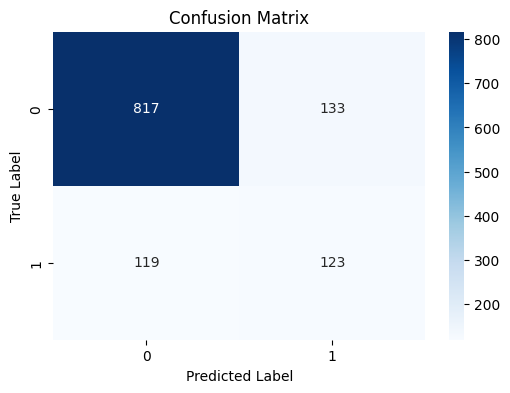

In [97]:
# 11. VISUALIZING CONFUSION MATRIX

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

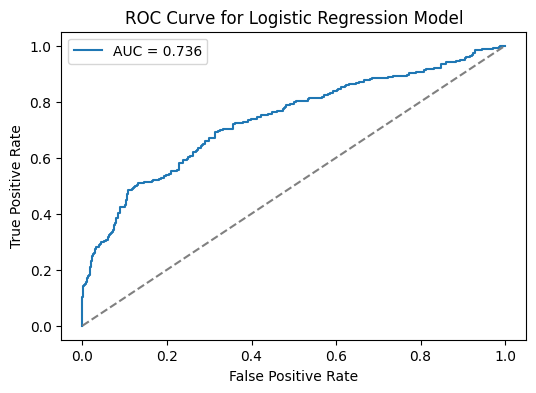


AUC Score: 0.735528490648108


In [98]:
# 12. ROC CURVE & AUC SCORE

y_prob = log_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = %0.3f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

print("\nAUC Score:", roc_auc)